# Домашее задание №3

## Задание 1

В файле Worldbank_tech.xlsx содержаться данные Всемирного банка по ряду показателей по странам. В файле следующие переменные:
    
    - country_name: Country Name
    - country_code: Country Code
    - internet: Internet users (per 100 people)
    - secure: Secure Internet servers (per 1 million people)
    - export: Communications, computer, etc. (% of service exports)
    - import: Communications, computer, etc. (% of service imports)
    - telephone: Fixed telephone subscriptions (per 100 people)
    - hightech: High-technology exports (current US$)
    - mobile: Mobile cellular subscriptions (per 100 people)
    

Проведите иерархический кластерный анализ данных с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

        1.	Обоснуйте выбор переменных кластеризации.

        2.	Выберите оптимальный метод иерархической кластеризации и обоснуйте свой выбор.

        3.	Создайте дендрограмму, опишите её.

        4.	Определите число кластеров, объясните своё решение.

        5.	Опишите получившиеся кластеры на основе описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

        6.	Дайте названия кластерам и обоснуйте их.

        7.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

world_banks_info = pd.read_excel("Worldbank_tech.xlsx")
world_banks_info.head()

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533


Для начала отберём все метрические переменные в отдельную таблицу, а также выведем таблицу корреляций между переменными. Воспользуемся корреляцией Пирсона.

In [ ]:
corr_variables = world_banks_info[['internet', 'secure', 'export', 'import', 'telephone', 'hightech', 'mobile']]
corr_variables.corr()

,internet,secure,export,import,telephone,hightech,mobile
internet,1.000000,0.512832,-0.035715,0.312703,0.752537,0.165190,0.530022
secure,0.512832,1.000000,0.156920,0.221424,0.513348,0.135452,0.101635
export,-0.035715,0.156920,1.000000,0.336778,0.087641,0.190186,-0.152821
import,0.312703,0.221424,0.336778,1.000000,0.337727,0.049743,0.200580
telephone,0.752537,0.513348,0.087641,0.337727,1.000000,0.232177,0.337005
hightech,0.165190,0.135452,0.190186,0.049743,0.232177,1.000000,-0.010553
mobile,0.530022,0.101635,-0.152821,0.200580,0.337005,-0.010553,1.000000


Так как для кластерного анализа подходят те переменные, корреляция между которыми наименьшая, то исходя из таблицы, мы можем выбрать следующие значения: secure, export, mobile, hightech. Выведем их в отдельную таблицу.

Заполним средним значением ячейки NaN

Для удобства использования можем сразу произвести нормировку по каждому значению.

In [ ]:
from sklearn import preprocessing

cluster_var = corr_variables[['secure', 'export', 'mobile', 'hightech']].copy()

cluster_var.loc[:, 'secure'] = cluster_var['secure'].fillna(cluster_var['secure'].mean())
cluster_var.loc[:, 'export'] = cluster_var['export'].fillna(cluster_var['export'].mean())
cluster_var.loc[:, 'mobile'] = cluster_var['mobile'].fillna(cluster_var['mobile'].mean())
cluster_var.loc[:, 'hightech'] = cluster_var['hightech'].fillna(cluster_var['hightech'].mean())

data_norm = preprocessing.MinMaxScaler().fit_transform(cluster_var.values)
data_norm

array([[1.34337630e-04, 8.38001824e-01, 1.71799738e-01, 2.68850295e-02],
       [3.68346540e-03, 2.79071620e-01, 3.12958773e-01, 2.72855866e-05],
       [2.44976241e-04, 6.79871497e-01, 3.33913653e-01, 4.41924163e-06],
       [7.03542891e-03, 3.94926335e-01, 3.17189312e-01, 2.68850295e-02],
       [1.59486931e-01, 3.94926335e-01, 2.55437666e-01, 2.68850295e-02],
       [5.31245013e-04, 4.44275385e-02, 1.69488003e-01, 2.68850295e-02],
       [2.98012296e-02, 3.94926335e-01, 4.10131734e-01, 0.00000000e+00],
       [6.18225781e-03, 5.67770153e-01, 4.31196551e-01, 2.60241965e-03],
       [4.78952406e-03, 2.84324151e-01, 3.40575518e-01, 1.99681302e-05],
       [2.72789204e-02, 1.54673909e-01, 4.05404955e-01, 2.15572318e-06],
       [1.42785103e-01, 2.65260240e-01, 3.96200939e-01, 7.64507229e-03],
       [1.46651731e-01, 4.36773193e-01, 4.73732328e-01, 2.87718129e-02],
       [1.59615032e-03, 1.38692383e-01, 3.28404791e-01, 1.70423532e-05],
       [3.29934524e-02, 8.80846273e-02, 2.30766317e

Построим Дендрограмму с помощью метода Варда, а также проведем анализ с помощью индекса Калински-Харабаша.

В данном случае мы используем метод Варда, так как он хорошо работает с метрическими переменными, способствует минимизации внутренних дисперсий.

,secure,export,mobile,hightech
0,1.414229,72.652794,61.577619,1.490164e+10
1,37.727137,25.303169,106.380207,1.512366e+07
2,2.546228,59.256825,113.031094,2.449466e+06
3,72.022759,35.117770,107.722941,1.490164e+10
4,1631.830630,35.117770,88.123533,1.490164e+10
...,...,...,...,...
212,453.781837,35.117770,107.722941,1.490164e+10
213,5.653368,44.171827,77.624612,5.099724e+06
214,0.633567,56.462032,67.980973,2.946931e+06
215,4.317851,8.549899,74.471778,3.650318e+07


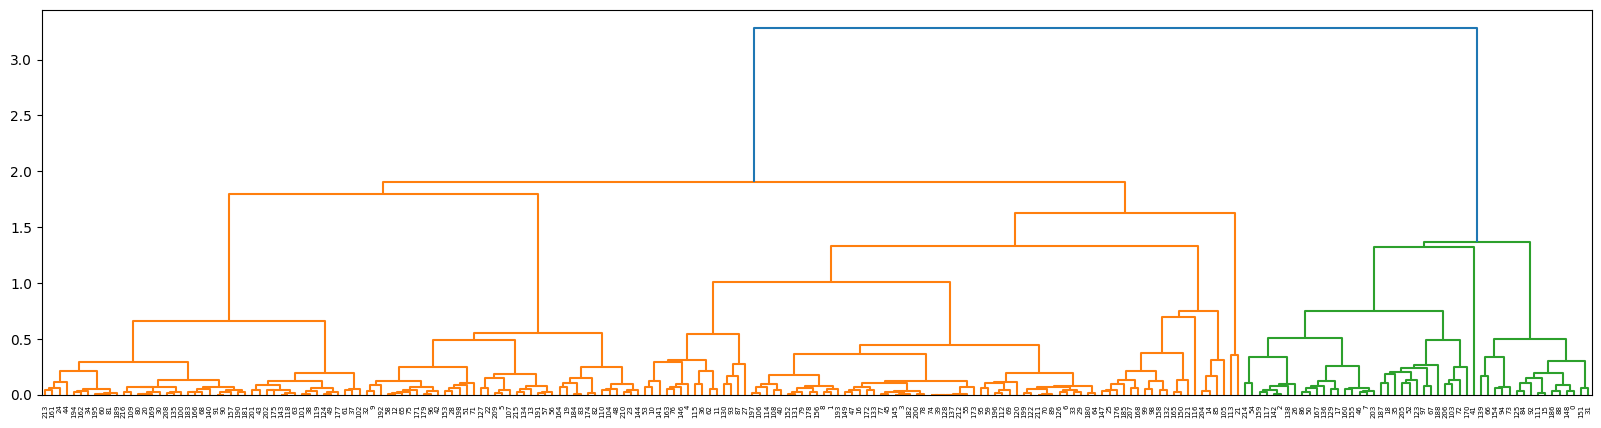

In [ ]:
from sklearn.metrics import calinski_harabasz_score

linked = linkage(data_norm, method='ward', metric='euclidean')
plt.figure(figsize=(20,5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

cluster_var

Данная дендрограмма показывает четкое разделение стран на две большие группы, которые можно интерпретировать как страны с различным уровнем экономического и технологического развития. Внутри этих больших кластеров наблюдаются подкластеры, которые, вероятно, отражают группы стран со схожими характеристиками в определенных аспектах, таких как кибербезопасность, мобильная связь, экспорт высокотехнологичных товаров и т. д.

In [ ]:
for k in range (2, 30):
    labels = fcluster(linked, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(cluster_var, labels)))

Number of clusters: 2, index 22.445015059518518
Number of clusters: 3, index 11.17358805791092
Number of clusters: 4, index 7.429607060719731
Number of clusters: 5, index 5.546113040894673
Number of clusters: 6, index 6.080842567205248
Number of clusters: 7, index 5.1097077832852245
Number of clusters: 8, index 95.03686563280664
Number of clusters: 9, index 82.77898958375602
Number of clusters: 10, index 73.23292564031661
Number of clusters: 11, index 125.66961049606326
Number of clusters: 12, index 113.70640328140648
Number of clusters: 13, index 103.92164184099803
Number of clusters: 14, index 95.49783089031374
Number of clusters: 15, index 88.31569810661368
Number of clusters: 16, index 82.15454142018045
Number of clusters: 17, index 77.14192561052552
Number of clusters: 18, index 72.6117426069186
Number of clusters: 19, index 150.76201829864294
Number of clusters: 20, index 144.58822609002246
Number of clusters: 21, index 136.77301025414684
Number of clusters: 22, index 132.0922927

Исходя из полученных данных, можем сделать вывод, что оптимальное количество кластеров по индексу Калински-Харабаша - 8, т.к. именно в этой точке индекс принимает максимальное значение, а затем идёт спад в границах нашей выборки от 2 до 10.

Добавим в начальную таблицу дополнительную колонку "Cluster_Hierarchical", которая будет отображать принаделжность к определенному кластеру.

In [ ]:
labels = fcluster(linked, t=7, criterion='maxclust')
cluster_var['Cluster_Hierarchical'] = labels # Создаём отдельную колонку для кластеров

cluster_var.head(10)

,secure,export,mobile,hightech,Cluster_Hierarchical
0,1.414229,72.652794,61.577619,1.490164e+10,1
1,37.727137,25.303169,106.380207,1.512366e+07,5
2,2.546228,59.256825,113.031094,2.449466e+06,2
3,72.022759,35.117770,107.722941,1.490164e+10,5
4,1631.830630,35.117770,88.123533,1.490164e+10,5
5,5.475188,5.425357,60.843896,1.490164e+10,6
6,304.951099,35.117770,137.222017,0.000000e+00,5
7,63.293537,49.760189,143.907797,1.442451e+09,2
8,49.043779,25.748135,115.145509,1.106779e+07,5
9,279.144086,14.764849,135.721780,1.194859e+06,6


Проведём описательную статистику, исходя из полученных данных.

In [ ]:
cluster_var.groupby('Cluster_Hierarchical')[['secure', 'export', 'mobile', 'hightech']].mean()

,secure,export,mobile,hightech
Cluster_Hierarchical,,,,
1,125.369796,1.388288,31.523756,1.007739e+06
2,6681.097077,11.441596,100.343200,2.532798e+05
3,203.236398,6.471452,114.663758,1.162117e+09
4,417.479681,30.041752,124.031852,3.142549e+09
5,364.149278,75.220394,91.674606,8.990161e+09
6,678.157314,52.221470,121.662878,3.240245e+10
7,10.117268,44.156282,93.161421,5.542729e+11


In [ ]:
 cluster_var[['secure', 'export', 'mobile', 'hightech']].describe()

,secure,export,mobile,hightech
count,217.000000,217.000000,217.000000,2.170000e+02
mean,441.570745,23.303958,101.269493,9.270608e+09
std,1117.982390,24.056387,48.378896,4.428480e+10
min,0.000000,0.000000,0.000000,0.000000e+00
25%,4.134486,0.000000,73.200007,0.000000e+00
50%,42.777482,17.349756,106.503710,2.946931e+06
75%,296.597185,40.912628,129.470390,5.387114e+08
max,10231.541925,86.376427,324.440813,5.542729e+11


На основе полученных данных можем сделать следующий вывод:



**1.   Кластер 1 - "Страны с низким уровнем цифровизации и технологическим развитием"**

**secure**: Средний показатель (125.37) на низком уровне.

**export**: Очень низкий показатель экспорта (1.39) на низком уровнею

**mobile**: Низкое количество мобильных подписок на 100 человек (31.52).

**hightech**: Объём высокотехнологичного экспорта составляешь всего лишь 1.01млн долларов, что свидетельствует о слабом технологическом секторе.

Данный кластер объединяет в себя страны с низким технологическим уровнем, о чем свидетельствует статистика переменных, по которым была проведена кластеризация.

Пример: Chad, Angola, Cuba.

**2. Кластер 2 - "Страны с приоритетом на кибербезопасность"**

**secure**: Очень высокий уровень защищенных интернет-серверов (6681), что указывает на высокий уровень внимания к вопросам кибербезопаности.

**export**: Низкая доля экспорта технологических услуг (11.44).

**mobile**: Уровень мобильных подписок находится на среднем значении (100.34).

**hightech**: Очень низкий объём технологического экспорта, который составляет всего лишь 253тыс. долларов, что свидетельствует о слабом развитии данного сектора.

Данный кластер включает в себя страны, где высокий уровень защищенности интернет-сервисов, несмотря на относительно низкий уровень технологического экспорта.

Пример: British Virgins Island, Bermuda.

**3. Кластер 3 - "Развивающиеся страны с растущей цифровизацией"**

**secure**: Средний показатель защищенности интернет-сервисов (203.24), что отражает начальны этап цифровизации.

**export**: Доля технологиечского экспорта - 6.47%, что говорит о слабом развитии данного сектора.

**mobile**: Относительно высокий уровень подписок (114.66), что указывает на растущий уровень цифровизации среди населения.

**hightech**: Высокий объём высокотехнологического экспорта (1.16млрд долларов), что выше, чем у предыдущих кластерах.

В этот кластер входят страны, которые, скорее всего, развивают технологический центр и повышают доступность интернет-сервисов среди населения.

Пример: Aruba, Vietnam, Andorra.

**4. Кластер 4 - "Умеренно развитые страны с высоким уровнем мобильной связи"**  
**secure**: Умеренное количество защищенных интернет-сервисов (417.48), что свидетельствует о достаточном уровне цифровой безопасности.

**export**: Доля технологического экспорта выше среднего (30.04%).

**mobile**: Высокий уровень мобильных подписок (124.03), что указывает на значительную распространенность мобильной связи.

**hightech**: Значительный объём высокотехнологичного экспорта (3.14млрд долларов).

В данный кластер входят страны, демонстрирующие высокий уровень мобильной связи и имеющие уверенный технологический сектор, что позволяет им обеспечвать высокий уровень мобильных технологий.

Пример: Australia, Austria, Armenia.

**5. Кластер 5 - Экспортно-ориентированные страны, с высоким уровнем технологий**

**secure**: Умеренный уровень защиты интернет-сервисов (364.15).

**export**: Высокая доля экспорта технологических услуг (75.22%), что говорит о сильной ориентации на внешний рынок.

**mobile**: Средний уровень интернет-подписок (91.67).

**hightech**: Объём высокотехнологичного экспорта значителен (8.99млрд долларов).

В этом кластере сосредоточены страны, где экономический рост поддерживается за счет высокотехнологических услуг и товаров, ориентированных на экспорт.

Пример: Burundi, Bangladesh.

**6. Кластер 6 - "Развитые страны с высокой технологической безопасностью"**

**secure**: Высокий уровень защищенных интернет-серверов (678.16), что говорит о высоком уровне цифровой безопасности.

**export**: Доля технологических услуг в экспорте (52.22%) на высоком уровне.

**mobile**: Высокий уровень мобильных подписок (121.66).

**hightech**: Очень высокий объем высокотехнологичного экспорта (32.4 млрд долларов).

К данному кластеру относятся страны, которые отличаются высоким уровнем развития технологий, при этом они уделяют внимание вопросам безопасности и защиты цифровой инфраструктуры.

Пример: Russia, Brazil, Canada.

**7. Кластер 7 - "Лидеры высоких технологий"**

**secure**: Низкий уровень защищенных серверов (10.12), что может указывать на фокус на других областях развития.

**export**: Умеренный уровень экспорта технологических услуг (44.16%).

**mobile**: Средний уровень мобильных подписок (93.16).

**hightech**: Самый высокий объем высокотехнологичного экспорта (554.27 млрд долларов) среди всех кластеров.

Эти страны являются лидерами в области высоких технологий и делают основной акцент на экспорт высокотехнологичной продукции, но уровень защищенности интернет-серверов остается низким.

Пример: China.

In [ ]:
cluster_var.describe()

,secure,export,mobile,hightech,Cluster_Hierarchical
count,217.000000,217.000000,217.000000,2.170000e+02,217.000000
mean,441.570745,23.303958,101.269493,9.270608e+09,3.483871
std,1117.982390,24.056387,48.378896,4.428480e+10,1.569668
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,4.134486,0.000000,73.200007,0.000000e+00,3.000000
50%,42.777482,17.349756,106.503710,2.946931e+06,3.000000
75%,296.597185,40.912628,129.470390,5.387114e+08,4.000000
max,10231.541925,86.376427,324.440813,5.542729e+11,7.000000


Кластерная структура: формирование кластеров связано с различиями в уровнях цифровизации, экспорта технологий, а также уровнем кибербезопасности среди стран. Получившаяся кластерная структура в основном соответствует ожиданиям: страны с высоким уровнем экспорта высоких технологий и мобильных подписок оказались в отдельных кластерах, как и страны с низким уровнем цифровизации и технологического развития.

Соответствие ожиданиям: неожиданно было выявить, что у страны, которая принадлежит Кластеру 7, уровень безопасности находится на низком значении. Скорее всего такие страны делают упор на экспортный сектор, нежели на собственную кибербезопасность.

## Задание 2

В файле Video_Games_Sales.csv содержаться данные о продажах видеоигр.
Источник: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

В файле следующие переменные::
    
    - Name: The game’s name
    - Platform: Platform of the game’s release (i.e. PC, PS4, etc.)
    - Year_of_Release: Year of the game's release
    - Genre: Genre of the game
    - Publisher: Publisher of the game
    - NA_Sales: Sales in North America (in millions)
    - EU_Sales: Sales in Europe (in millions)
    - JP_Sales: Sales in Japan (in millions)
    - Other_Sales: Sales in the rest of the world (in millions)
    - Global_Sales: Total worldwide sales.
    - Critic_score: Aggregate score compiled by Metacritic staff
    - Criticcount: The number of critics used in coming up with the Criticscore
    - User_score: Score by Metacritic's subscribers
    - Usercount: Number of users who gave the userscore
    - Developer: Party responsible for creating the game
    - Rating: The ESRB ratings


Проведите кластерный анализ на основе алгоритмов k-средних или DBSCAN с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

    1.Обоснуйте выбор переменных кластеризации.

    2.Выберите один из двух алгоритмов кластеризации (k-средних или DBSCAN) и обоснуйте свой выбор.

    3.Определите число кластеров, объясните своё решение.

    4.Опишите получившиеся кластеры с помощью описательной статистики. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

    5.Дайте названия кластерам и обоснуйте их.

    6.Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?


Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

In [ ]:
video_games_sales_info = pd.read_csv("video_games_sales.csv")
video_games_sales_info.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Для начала отберём все метрические переменные в отдельную таблицу, а также выведем таблицу корреляций между переменными. Воспользуемся корреляцией Пирсона.

In [ ]:
corr_val = video_games_sales_info[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales',
                                  'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count',
                                   'User_Count']]

corr_val.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


Исходя из таблицы, для кластеризации возьмем такие переменные: Year_of_Release, Critic_Score, Critic_Count, User_Count. Были выбраны данные значени, т.к. корреляция между ними
составляет <0,5.

Заполним ячейки NaN каждой колонки усредненным значением по колонке.

In [ ]:
corr_val.loc[:, 'Year_of_Release'] = corr_val['Year_of_Release'].fillna(corr_val['Year_of_Release'].mean())
corr_val.loc[:, 'Critic_Score'] = corr_val['Critic_Score'].fillna(corr_val['Critic_Score'].mean())
corr_val.loc[:, 'Critic_Count'] = corr_val['Critic_Count'].fillna(corr_val['Critic_Count'].mean())
corr_val.loc[:, 'User_Count'] = corr_val['User_Count'].fillna(corr_val['User_Count'].mean())

corr_val.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092357,0.003836,-0.168230,0.037648,-0.076330,0.005762,0.110357,0.086158
NA_Sales,-0.092357,1.000000,0.765336,0.449598,0.638654,0.941010,0.185081,0.227100,0.188975
EU_Sales,0.003836,0.765336,1.000000,0.435068,0.722796,0.901239,0.194493,0.244520,0.249668
JP_Sales,-0.168230,0.449598,0.435068,1.000000,0.291096,0.612300,0.091372,0.107915,0.045211
Other_Sales,0.037648,0.638654,0.722796,0.291096,1.000000,0.749242,0.184875,0.234303,0.222953
Global_Sales,-0.076330,0.941010,0.901239,0.612300,0.749242,1.000000,0.200976,0.248545,0.216355
Critic_Score,0.005762,0.185081,0.194493,0.091372,0.184875,0.200976,1.000000,0.425504,0.245389
Critic_Count,0.110357,0.227100,0.244520,0.107915,0.234303,0.248545,0.425504,1.000000,0.341021
User_Count,0.086158,0.188975,0.249668,0.045211,0.222953,0.216355,0.245389,0.341021,1.000000


In [ ]:
cluster_val = corr_val[['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count']]
cluster_val.describe()

,Year_of_Release,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.487356,68.967679,26.360821,162.229908
std,5.831505,9.723417,13.241001,378.165132
min,1980.000000,13.000000,3.000000,4.000000
25%,2003.000000,68.967679,22.000000,30.000000
50%,2007.000000,68.967679,26.360821,162.229908
75%,2010.000000,70.000000,26.360821,162.229908
max,2020.000000,98.000000,113.000000,10665.000000


Произведём нормировку даннцых.

In [ ]:
data_norm1 = preprocessing.MinMaxScaler().fit_transform(cluster_val.values)
data_norm1

array([[0.65      , 0.74117647, 0.43636364, 0.02982835],
       [0.125     , 0.65844328, 0.2123711 , 0.01484194],
       [0.7       , 0.81176471, 0.63636364, 0.06612888],
       ...,
       [0.9       , 0.65844328, 0.2123711 , 0.01484194],
       [0.575     , 0.65844328, 0.2123711 , 0.01484194],
       [0.9       , 0.65844328, 0.2123711 , 0.01484194]])

Найдём предварительное количество кластеров с помощью индекса Калински-Харабаши.

In [ ]:
linked1 = linkage(data_norm1, method='ward', metric='euclidean')
for k in range (2, 15):
    labels = fcluster(linked1, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(data_norm1, labels)))

Number of clusters: 2, index 5341.416209104303
Number of clusters: 3, index 6576.379556216833
Number of clusters: 4, index 7110.301474812854
Number of clusters: 5, index 6699.733568324332
Number of clusters: 6, index 6203.567928414849
Number of clusters: 7, index 5855.871786012989
Number of clusters: 8, index 5681.859526593444
Number of clusters: 9, index 5641.177964046524
Number of clusters: 10, index 5553.205793302576
Number of clusters: 11, index 5496.537350529987
Number of clusters: 12, index 5341.378936513839
Number of clusters: 13, index 5223.736782777546
Number of clusters: 14, index 5124.3318655910825


Исходя из анализа, можем увидеть, что оптимальное количество кластеров по индексу Калински-Харабаша: 4, т.к. именно напротив этого значения наш индекс принимает максимальное значение среди выборки от 2 до 15.

Используем это значение для алгоритма k-means. Был выбран именно данный алгоритм, т.к. метод k-means подходит для выборки большoго размера, а также потому что у нас заранее известно предполагаемое количество кластеров.

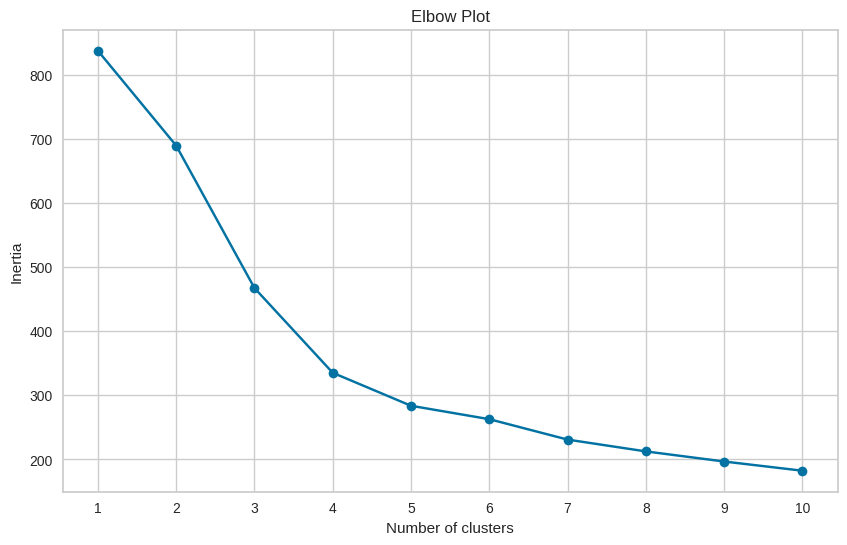

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_norm1)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

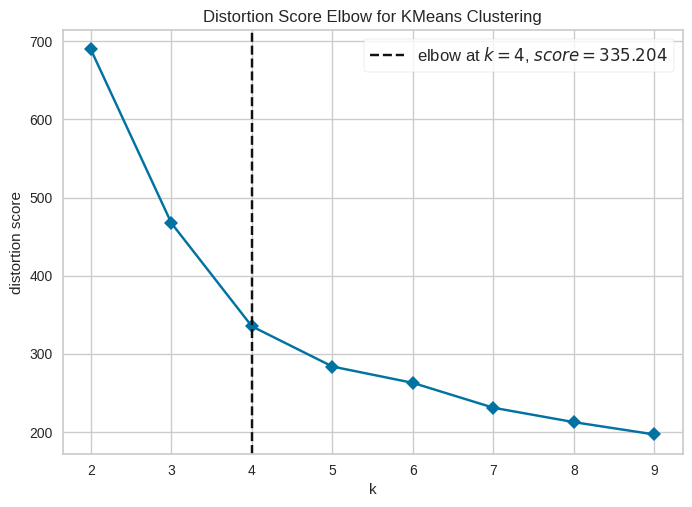

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(data_norm1)
visualizer.show()
plt.show()

Проанализировав датасет методом k-средних и визуализировав результаты с помощью метода локтя, мы можем сделать вывод, что оптимальное количество кластеров - 4.

Изобразим количество значений, которые принадлежат каждому из кластеров. А также выведем средние значения по каждому из колонок для каждого из кластеров.

In [ ]:
kmeans_model = KMeans(n_clusters=4).fit_predict(data_norm1)
video_games_sales_info['Cluster_Info'] = kmeans_model

video_games_sales_info['Cluster_Info'].value_counts()

,count
Cluster_Info,
0,8659
1,4407
3,2107
2,1546


In [ ]:
video_games_sales_info.groupby('Cluster_Info')[['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count']].mean(numeric_only=True)

,Year_of_Release,Critic_Score,Critic_Count,User_Count
Cluster_Info,,,,
0,2009.856907,72.300721,22.496052,95.933124
1,1999.084411,75.693826,19.944621,64.041728
2,2008.946955,80.517464,57.547219,519.413860
3,2006.659036,50.869957,13.605126,24.295652


In [ ]:
video_games_sales_info[['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count']].describe()

,Year_of_Release,Critic_Score,Critic_Count,User_Count
count,16450.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,68.967679,26.360821,162.229908
std,5.878995,13.938165,18.980495,561.282326
min,1980.000000,13.000000,3.000000,4.000000
25%,2003.000000,60.000000,12.000000,10.000000
50%,2007.000000,71.000000,21.000000,24.000000
75%,2010.000000,79.000000,36.000000,81.000000
max,2020.000000,98.000000,113.000000,10665.000000


Исходя из полученных данных, можем выделить следующие кластеры:

**1. Кластер 0 - "Современные игры с умеренными показателями"**

**Year_of_Release**: 2009.86 — это достаточно недавний год выпуска, что делает игры в этом кластере сравнительно новыми.

**Critic_Score**: 72.30 — оценка выше среднего уровня, что указывает на положительное восприятие критиками.

**Critic_Count**: 22.50 — умеренное количество рецензий от критиков, немного ниже среднего уровня.

**User_Count**: 95.93 — показатель пользовательского интереса чуть выше среднего, что говорит о популярности среди игроков, но не на уровне "хита".

Кластер 0 включает в себя игры со средними показателями по всем метрикам. Это могут быть стабильные, но не выделяющиеся игры, привлекающие умеренное внимание критиков и пользователей.

Пример: "Nintendogs", "Wii Fit Plus", "Kinect Adventures".

**2. Кластер 1 - "Старые игры с высокими оценками, но небольшим вниманием"**

**Year_of_Release**: 1999.08 — это старые игры, выпущенные гораздо раньше среднего года.

**Critic_Score**: 75.69 — высокая оценка критиков, что указывает на качественный контент.

**Critic_Count**: 19.94 — количество рецензий от критиков несколько ниже среднего, что говорит о скромном интересе к этим играм.

**User_Count**: 64.04 — количество пользовательских отзывов на низком уровне, что указывает на ограниченную популярность.

Кластер 1 представляет из себя проекты, которые получили хорошие отзывы от критиков, но имеют меньшее количество обзоров и сравнительно небольшой интерес среди пользователей. Вероятно, это качественные игры прошлых лет.

Пример: "Super Mario Bros", "Tetris", "Duck Hunt".

**3. Кластер 2 - "Современные блокбастеры с высоким интересом"**

**Year_of_Release**: 2008.95 — более новые игры по сравнению с другими.

**Critic_Score**:  80.52 — высокая оценка, что указывает на положительное восприятие критиками.

**Critic_Count**: 57.55 — большое количество рецензий, указывающее на высокий интерес критиков.

**User_Count**: 519.41 — огромное количество пользовательских отзывов, что свидетельствует о большой популярности.

Кластер 2 включает в себя наиболее успешные и популярные игры, получившие высокие оценки критиков и большой интерес со стороны пользователей.

Примеры: "Wii Sports", "Evil Genius", "Trine".

**4. Кластер 3 - "Менее популярные игры с низкими оценками"**

**Year_of_Release**: 2006.66 — игры, выпущенные примерно в середине 2000-х годов.

**Critic_Score**:  50.87 — низкая оценка критиков, что указывает на слабое качество игр.

**Critic_Count**: 13.61 — небольшое количество рецензий, что свидетельствует об ограниченном интересе критиков.

**User_Count**: 24.30 — низкий уровень пользовательских отзывов, что указывает на невысокую популярность.

Кластер может включать игры, которые сложно классифицировать из-за отсутствия информации о дате выпуска. В целом, это игры со смешанными отзывами, привлекающие умеренное внимание.

Примеры: "Just Dance", "Carnival Games", "15 Days".

Кластерная структура: Разделение на кластеры логично, поскольку оно отражает распределение по популярности и качеству игр, а также степень интереса критиков и пользователей. Структура соответствует основным характеристикам и ожиданиям: игры высокого качества (Кластер "Старые игры с высокими оценками, но небольшим вниманием") собраны отдельно, игры со смешанными показателями также выделены в отдельный кластер.

Соответствие ожиданиям: Данные оказались логично распределены, что соответствует интуитивным ожиданиям — популярные игры с высоким уровнем критики и пользовательского интереса выделились отдельно, как и игры с низкими оценками.

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 30 октября.